In [1]:
from ase import Atoms

d = 1.10
molecule = Atoms(['N', 'N'], positions=[(0., 0., 0.), (0., 0., d)])

In [2]:
molecule = Atoms('N2', positions=[(0., 0., 0.), (0., 0., d)])

In [3]:
from ase.visualize import view
view(molecule)

<Popen: returncode: None args: ['/Users/lucy/miniconda3/envs/ase-tutorial/bi...>

In [4]:
import nglview
nglview.show_ase(molecule,gui=True)



NGLWidget()

In [5]:
a = 5.387
crystal = Atoms('Zn4S4',
                scaled_positions=[[0., 0., 0.],
                                  [0., 0.5, 0.5],
                                  [0.5, 0., 0.5],
                                  [0.5, 0.5, 0.],
                                  [0.25, 0.75, 0.75],
                                  [0.25, 0.25, 0.25],
                                  [0.75, 0.75, 0.25],
                                  [0.75, 0.25, 0.75]],
               cell=[a, a, a],
               pbc=True)

def show(atoms: Atoms) -> None:    
    view = nglview.show_ase(atoms)
    if any(atoms.pbc):
        view.add_unitcell()
        view.add_ball_and_stick(aspectRatio=4)

    return view



In [6]:
a = 5.387
crystal = Atoms('Zn4S4',
                scaled_positions=[[0., 0., 0.],
                           [0., 0.5, 0.5],
                           [0.5, 0., 0.5],
                           [0.5, 0.5, 0.],
                           [0.25, 0.75, 0.75],
                           [0.25, 0.25, 0.25],
                           [0.75, 0.75, 0.25],
                           [0.75, 0.25, 0.75]],
               cell=[a, a, a],
               pbc=True)

def show(atoms: Atoms) -> nglview.widget.NGLWidget:    
    view = nglview.show_ase(atoms)
    if any(atoms.pbc):
        view.add_unitcell()
        view.add_ball_and_stick(aspectRatio=6)
    return view

show(crystal)

NGLWidget()

In [36]:
view.clear_representations()

In [37]:
view.add_cartoon()

In [40]:
view

NGLWidget()

In [31]:
view._display_image()

In [96]:
import ase.io
from pathlib import Path

imported_crystal = ase.io.read("../data/ZnS.cif", format='cif')

len(imported_crystal)



8

In [75]:
ase.io.write('geometry.in', imported_crystal, scaled=True)

In [76]:
cat geometry.in

#=======================================================
# FHI-aims file: geometry.in
# Created using the Atomic Simulation Environment (ASE)
# Wed Apr 12 11:18:21 2023
#=======================================================
lattice_vector 5.3873657499999998 0.0000000000000000 0.0000000000000000 
lattice_vector 0.0000000000000000 5.3873657499999998 0.0000000000000000 
lattice_vector 0.0000000000000000 0.0000000000000000 5.3873657499999998 
atom_frac 0.0000000000000000 0.0000000000000000 0.0000000000000000 Zn
atom_frac 0.0000000000000000 0.5000000000000000 0.5000000000000000 Zn
atom_frac 0.5000000000000000 0.0000000000000000 0.5000000000000000 Zn
atom_frac 0.5000000000000000 0.5000000000000000 0.0000000000000000 Zn
atom_frac 0.2500000000000000 0.7500000000000000 0.7500000000000000 S
atom_frac 0.2500000000000000 0.2500000000000000 0.2500000000000000 S
atom_frac 0.7500000000000000 0.7500000000000000 0.2500000000000000 S
atom_frac 0.7500000000000000 0.2500000000000000 0.7500000000000000 S

In [77]:
ase.io.write?


In [92]:
atoms = imported_crystal

atoms_sequence = []
for frame in range(10):
    atoms.rattle(stdev=0.02,seed=frame)  # rattle modifies the atoms in-place
    atoms_sequence.append(atoms.copy())
    
ase.io.write('ZnS_rattle.xyz', atoms_sequence, format='extxyz')

In [102]:
atoms_frame = ase.io.read('ZnS_rattle.xyz')

type(atoms_frame)

ase.atoms.Atoms

In [103]:
atoms_alternating = ase.io.read('ZnS_rattle.xyz', index='::2')


In [104]:
type(atoms_alternating)

list

In [83]:
type(atoms_alternating)

list

In [86]:
[2,5,6][:2]

[2, 5]

/Users/mynf8/.local/lib/python3.11/site-packages/ase/visualize/plot.py:59: UserWarning: You passed in an explicit save_count=100 which is being ignored in favor of len(frames)=10.
  animation = FuncAnimation(fig, drawimage, frames=images,
MovieWriter ffmpeg unavailable; using Pillow instead.


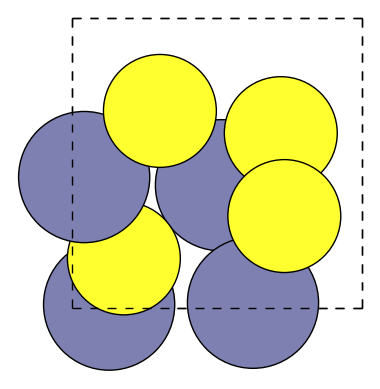

In [93]:
ase.io.write('rattle.gif', atoms_sequence)

In [106]:
import ase.build
g2_n2 = ase.build.molecule('N2')
show(g2_n2)

NGLWidget()

In [107]:
type(g2_n2)

ase.atoms.Atoms

In [108]:
show(ase.build.molecule('C60'))

NGLWidget()

In [109]:
show(ase.build.bulk('Cu', cubic=True))

NGLWidget()

In [110]:
show(
    ase.build.bulk('ZnS',
                   crystalstructure='zincblende',
                   a=5.387,
                   cubic=True)
)

NGLWidget()

In [111]:
si = ase.build.bulk('Si', cubic=True)
show(si)


NGLWidget()

In [112]:
show(si * 4)

NGLWidget()

In [113]:
show(si * [2, 4, 1])

NGLWidget()

In [114]:
ase.build.find_optimal_cell_shape(si_prim.cell, 4, 'sc', verbose=True)

NameError: name 'si_prim' is not defined

In [122]:
type(si_prim.cell)

ase.cell.Cell

In [120]:
si_prim = ase.build.bulk('Si')
show(si_prim)
print(si_prim.cell)

Cell([[0.0, 2.715, 2.715], [2.715, 0.0, 2.715], [2.715, 2.715, 0.0]])


In [116]:
ase.build.find_optimal_cell_shape(si_prim.cell, 4, 'sc', verbose=True)

target metric (h_target):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
normalization factor (Q): 0.184162
idealized transformation matrix:
[[-1.  1.  1.]
 [ 1. -1.  1.]
 [ 1.  1. -1.]]
closest integer transformation matrix (P_0):
[[-1  1  1]
 [ 1 -1  1]
 [ 1  1 -1]]
smallest score (|Q P h_p - h_target|_2): 0.000000
optimal transformation matrix (P_opt):
[[-1  1  1]
 [ 1 -1  1]
 [ 1  1 -1]]
supercell metric:
[[5.43 0.   0.  ]
 [0.   5.43 0.  ]
 [0.   0.   5.43]]
determinant of optimal transformation matrix: 4


array([[-1,  1,  1],
       [ 1, -1,  1],
       [ 1,  1, -1]])

In [117]:
x = ase.build.find_optimal_cell_shape(si_prim.cell, 4, 'sc', verbose=True)

target metric (h_target):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
normalization factor (Q): 0.184162
idealized transformation matrix:
[[-1.  1.  1.]
 [ 1. -1.  1.]
 [ 1.  1. -1.]]
closest integer transformation matrix (P_0):
[[-1  1  1]
 [ 1 -1  1]
 [ 1  1 -1]]
smallest score (|Q P h_p - h_target|_2): 0.000000
optimal transformation matrix (P_opt):
[[-1  1  1]
 [ 1 -1  1]
 [ 1  1 -1]]
supercell metric:
[[5.43 0.   0.  ]
 [0.   5.43 0.  ]
 [0.   0.   5.43]]
determinant of optimal transformation matrix: 4


In [118]:
x

array([[-1,  1,  1],
       [ 1, -1,  1],
       [ 1,  1, -1]])

In [119]:
si_prim.cell

Cell([[0.0, 2.715, 2.715], [2.715, 0.0, 2.715], [2.715, 2.715, 0.0]])

In [123]:
show(
    ase.build.make_supercell(si_prim, x)
)

NGLWidget()

In [124]:
ase.build.find_optimal_cell_shape?

In [125]:
ase.build.make_supercell(si_prim, x).cell

Cell([5.43, 5.43, 5.43])

In [126]:
si = ase.build.bulk('Si', cubic=True)
si.cell

Cell([5.43, 5.43, 5.43])

In [128]:
crystal = ase.build.bulk('ZnS',
                   crystalstructure='zincblende',
                   a=5.387,
                   cubic=True)

for atom in crystal:
    print(atom.symbol, atom.position, atom.mass)

Zn [0. 0. 0.] 65.38
S [1.34675 1.34675 1.34675] 32.06
Zn [0.     2.6935 2.6935] 65.38
S [1.34675 4.04025 4.04025] 32.06
Zn [2.6935 0.     2.6935] 65.38
S [4.04025 1.34675 4.04025] 32.06
Zn [2.6935 2.6935 0.    ] 65.38
S [4.04025 4.04025 1.34675] 32.06


In [129]:
zinc_indices = [i for i, atom in enumerate(crystal) if atom.symbol == 'Zn']
zinc_sublattice = crystal[zinc_indices]
show(zinc_sublattice)

NGLWidget()

In [130]:
from ase import Atom
composite = zinc_sublattice.copy()
composite.append(Atom('He', position=(1.34675, 4.04025, 4.04025)))
show(composite)

NGLWidget()

In [131]:
zinc_vacancy = crystal.copy()
del zinc_vacancy[0]
show(zinc_vacancy)

NGLWidget()

In [133]:
antisite = crystal.copy()
antisite.positions[[0, 1]] = antisite.positions[[1, 0]]
show(antisite)

NGLWidget()

In [135]:
sulfur_indices = [i for i, atom in enumerate(crystal) if atom.symbol == 'S']
sulfur_sublattice = crystal[sulfur_indices]
sulfur_sublattice.translate([.3, 0., 0.])
show(zinc_sublattice + sulfur_sublattice)

NGLWidget()

/Users/mynf8/.local/lib/python3.11/site-packages/ase/visualize/plot.py:59: UserWarning: You passed in an explicit save_count=100 which is being ignored in favor of len(frames)=61.
  animation = FuncAnimation(fig, drawimage, frames=images,
MovieWriter ffmpeg unavailable; using Pillow instead.


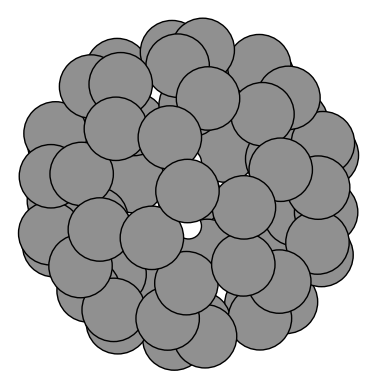

In [137]:
water = ase.build.molecule('H2O')
water.center()

bucky = ase.build.molecule('C60')
bucky.center()

start_atom = 36
distances = bucky.get_all_distances()[start_atom]
sorted_bucky_indices = sorted(enumerate(distances),
                               key = (lambda x: x[1]))
sorted_bucky_indices = [i for i, _ in sorted_bucky_indices]
sorted_bucky = bucky[sorted_bucky_indices]

frames = [water.copy()]
 
for i in range(len(sorted_bucky)):
     frames.append(water + sorted_bucky[:i + 1])

from ase.io.animation import write_gif

_ = write_gif('wrapped_molecule.gif', frames)

In [138]:
from ase import Atoms
from ase.calculators.emt import EMT

def make_wire(spacing: float = 2.5,
              box_size: float = 10.0) -> Atoms:

    wire = Atoms('Au',
                 positions=[[0., box_size / 2, box_size / 2]],
                 cell=[spacing, box_size, box_size],
                 pbc=[True, False, False])
    return wire

atoms = make_wire()
show(atoms)

NGLWidget()

In [139]:
atoms.calc = EMT()
energy = atoms.get_potential_energy()
print(f"Energy: {energy} eV")

Energy: 0.9910548478768826 eV


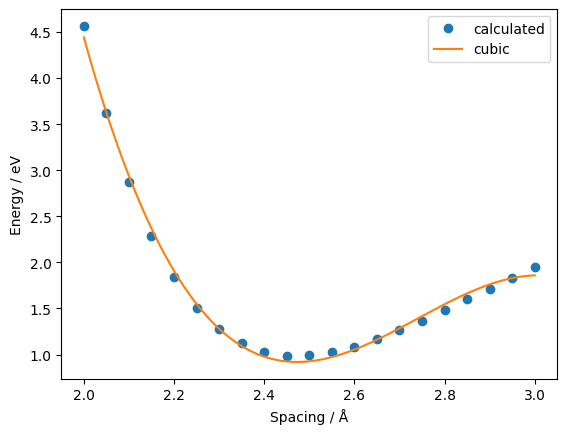

In [143]:
import numpy as np
distances = np.linspace(2., 3., 21)

def get_energy(spacing: float) -> float:
    atoms = make_wire(spacing=spacing)
    atoms.calc = EMT()
    return atoms.get_potential_energy()

energies = list(map(get_energy, distances))

from numpy.polynomial import Polynomial
fit = Polynomial.fit(distances, energies, 3)

%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = np.linspace(2., 3., 500)

_ = ax.plot(distances, energies, 'o', label='calculated')
_ = ax.plot(x, fit(x), '-', label='cubic')
_ = ax.legend()
_ = ax.set_xlabel('Spacing / Å')
_ = ax.set_ylabel('Energy / eV')

In [144]:
print("Forces: ")
print(atoms.get_forces())

print("Stress: ")
print(atoms.get_stress())

Forces: 
[[0. 0. 0.]]
Stress: 
[ 0.00396458 -0.         -0.         -0.         -0.         -0.        ]


In [145]:
print(EMT.implemented_properties)

['energy', 'energies', 'forces', 'stress', 'magmom', 'magmoms']


In [146]:
properties = atoms.get_properties(['energy', 'forces', 'stress'])
print(properties)

(Properties({'energy': 0.9910548478768826, 'natoms': 1, 'energies': array([0.99105485]), 'free_energy': 0.9910548478768826, 'forces': array([[0., 0., 0.]]), 'stress': array([ 0.00396458, -0.        , -0.        , -0.        , -0.        ,
       -0.        ])})


In [147]:
from ase.calculators.lj import LennardJones

l = 4.1
atoms = Atoms('Xe2',
              positions=[[0., 0., -l / 2],
                         [0., 0., l / 2]],
              pbc=False)
atoms.calc = LennardJones(sigma=(4.1 / 2**(1/6)))

atoms.get_forces()


array([[ 0.00000000e+00,  0.00000000e+00, -6.49886649e-16],
       [ 0.00000000e+00,  0.00000000e+00,  6.49886649e-16]])

In [7]:
import ase.build
atoms = ase.build.molecule('C2H6CHOH')
show(atoms)

NGLWidget()

In [8]:
from ase.calculators.mopac import MOPAC
atoms.calc = MOPAC(label='isopropyl-alcohol')

In [10]:
atoms.get_potential_energy()



          MOPAC Job: "isopropyl-alcohol.mop" ended normally on Apr 12, 2023, at 18:45.



PropertyNotImplementedError: energy not present in this calculation